In [1]:
%matplotlib inline

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_cases_switzerland.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df

,Date,AG,AI,AR,BE,BL,BS,FR,GE,GL,...,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH,CH
0,2020-03-06,10.0,0.0,1.0,20.0,9,17.0,7,17,0.0,...,1.0,7.0,1.0,37,0.0,23.0,4.0,5.0,24.0,208
1,2020-03-07,14.0,0.0,1.0,25.0,13,22.0,7,26,0.0,...,1.0,7.0,1.0,43,0.0,30.0,5.0,6.0,28.0,263
2,2020-03-08,14.0,0.0,1.0,31.0,19,25.0,8,35,0.0,...,1.0,7.0,1.0,58,0.0,40.0,5.0,7.0,34.0,328
3,2020-03-09,14.0,0.0,2.0,34.0,20,29.0,10,44,0.0,...,1.0,7.0,2.0,67,0.0,51.0,7.0,7.0,36.0,376
4,2020-03-10,15.0,0.0,2.0,39.0,22,39.0,12,68,0.0,...,1.0,7.0,3.0,91,0.0,77.0,15.0,7.0,45.0,505
5,2020-03-11,17.0,0.0,2.0,41.0,23,49.0,16,79,2.0,...,3.0,8.0,4.0,131,0.0,108.0,18.0,7.0,55.0,640
6,2020-03-12,22.0,0.0,2.0,51.0,29,80.0,22,108,2.0,...,7.0,9.0,5.0,170,0.0,156.0,23.0,7.0,91.0,880
7,2020-03-13,28.0,0.0,5.0,62.0,42,111.0,29,173,4.0,...,8.0,10.0,5.0,218,2.0,222.0,29.0,7.0,140.0,1223
8,2020-03-14,31.0,2.0,5.0,78.0,48,119.0,36,282,5.0,...,10.0,13.0,5.0,262,2.0,273.0,47.0,9.0,148.0,1530
9,2020-03-15,NaN,NaN,NaN,NaN,54,NaN,40,372,NaN,...,NaN,13.0,NaN,291,NaN,406.0,NaN,NaN,NaN,2155


In [5]:
def nan_detector(column):
    nan_value = 0
    counter = 0
    for i in column:
        if column.isnull()[counter]:
            nan_value+=1
            if counter == len(column)-1:
                if column.isnull()[counter]:
                    for j in range(nan_value):
                        column[counter-j]=column[counter-nan_value]
                return
            elif not column.isnull()[counter+1]:
                diff = column[counter+1] - column[counter-nan_value]
                for j in range(nan_value):
                    column[counter-j] = column[counter+1-j] - (1/(nan_value+1)) * diff
                nan_value = 0
        counter+=1
    

In [6]:
nan_detector(df['AG'])
nan_detector(df['AI'])
nan_detector(df['AR'])
nan_detector(df['BE'])
nan_detector(df['BL'])
nan_detector(df['BS'])
nan_detector(df['JU'])
nan_detector(df['LU'])
nan_detector(df['SG'])
nan_detector(df['VS'])
nan_detector(df['GR'])
nan_detector(df['TG'])
nan_detector(df['NE'])
nan_detector(df['OW'])
nan_detector(df['NW'])
nan_detector(df['UR'])
nan_detector(df['SZ'])
nan_detector(df['FR'])
nan_detector(df['SH'])
nan_detector(df['GL'])
nan_detector(df['TI'])
nan_detector(df['SO'])
nan_detector(df['GE'])
nan_detector(df['VD'])
nan_detector(df['ZH'])
nan_detector(df['ZG'])

C:\Users\Lutharsanen\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Lutharsanen\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [7]:
df

,Date,AG,AI,AR,BE,BL,BS,FR,GE,GL,...,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH,CH
0,2020-03-06,10.0,0.00,1.00,20.0,9,17.0,7,17,0.00,...,1.00,7.000000,1.0,37,0.00,23.0,4.0,5.000000,24.0,208
1,2020-03-07,14.0,0.00,1.00,25.0,13,22.0,7,26,0.00,...,1.00,7.000000,1.0,43,0.00,30.0,5.0,6.000000,28.0,263
2,2020-03-08,14.0,0.00,1.00,31.0,19,25.0,8,35,0.00,...,1.00,7.000000,1.0,58,0.00,40.0,5.0,7.000000,34.0,328
3,2020-03-09,14.0,0.00,2.00,34.0,20,29.0,10,44,0.00,...,1.00,7.000000,2.0,67,0.00,51.0,7.0,7.000000,36.0,376
4,2020-03-10,15.0,0.00,2.00,39.0,22,39.0,12,68,0.00,...,1.00,7.000000,3.0,91,0.00,77.0,15.0,7.000000,45.0,505
5,2020-03-11,17.0,0.00,2.00,41.0,23,49.0,16,79,2.00,...,3.00,8.000000,4.0,131,0.00,108.0,18.0,7.000000,55.0,640
6,2020-03-12,22.0,0.00,2.00,51.0,29,80.0,22,108,2.00,...,7.00,9.000000,5.0,170,0.00,156.0,23.0,7.000000,91.0,880
7,2020-03-13,28.0,0.00,5.00,62.0,42,111.0,29,173,4.00,...,8.00,10.000000,5.0,218,2.00,222.0,29.0,7.000000,140.0,1223
8,2020-03-14,31.0,2.00,5.00,78.0,48,119.0,36,282,5.00,...,10.00,13.000000,5.0,262,2.00,273.0,47.0,9.000000,148.0,1530
9,2020-03-15,41.5,2.25,6.25,104.5,54,131.5,40,372,6.25,...,15.25,13.000000,11.0,291,2.75,406.0,63.0,11.000000,209.0,2155


In [8]:
lst = [i for i in range(1,len(df['Date'])+1)]
print(lst)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


Text(0, 0.5, 'Kantone')

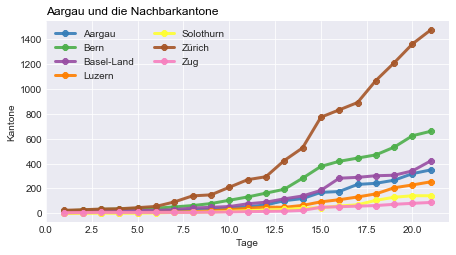

In [9]:
# Make a data frame
data=pd.DataFrame({'x': lst, 
                 'Aargau': df['AG'],
                 'Bern': df['BE'], 
                'Basel-Land':df['BL'],
                'Luzern':df['LU'],
                'Solothurn':df['SO'],
                 'Zürich': df['ZH'],
                'Zug': df['ZG'],
                 
                 })

# style
plt.style.use('seaborn-darkgrid')
fig= plt.figure(figsize=(7,3.5))

axes= fig.add_axes([0.1,0.1,0.8,0.8])
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in data.drop('x', axis=1):
    num+=1
    plt.plot(data['x'], data[column], marker='8', color=palette(num), linewidth=3, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Aargau und die Nachbarkantone", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Tage")
plt.ylabel("Kantone")


In [10]:
# Make a data frame
de_grenzkanton=pd.DataFrame({ 
                'Zürich': df['ZH'],
                 'Aargau': df['AG'],
                 'Basel-Stadt': df['BS'], 
                'Basel-Land':df['BL'],
                'Thurgau':df['TG'],
                'Schaffhausen':df['SH'],
                 })

fr_grenzkanton=pd.DataFrame({ 
               'Basel-Stadt': df['BS'], 
                'Basel-Land':df['BL'],
                 'Jura': df['JU'], 
                'Neuenburg':df['NE'],
                'Waadt':df['VD'],
                'Genf':df['GE'],
                'Wallis':df['VS'],
                 })


it_grenzkanton=pd.DataFrame({ 
               'Wallis':df['VS'],
                'Tessin':df['TI'],
                 'Graubünden': df['GR'], 
                 })

at_grenzkanton=pd.DataFrame({ 
               'St-Gallen':df['SG'],
                 'Graubünden': df['GR'], 
                 })

no_grenzkanton=pd.DataFrame({ 
                'Bern':df['BE'],
             'Luzern': df['LU'],
           'Obwalden': df['OW'],
          'Nidwalden': df['NW'],
                'Uri': df['UR'],
             'Glarus': df['GL'],
             'Schwyz': df['SZ'],
            'Freiburg': df['FR'], 
                 'Zug': df['ZG'], 
        'Appenzell Innerrhoden': df['AI'], 
        'Appenzell Ausserrhoden': df['AR'], 
                 })

In [11]:
de_gz = de_grenzkanton.mean(axis=1)
fr_gz = fr_grenzkanton.mean(axis=1)
it_gz = it_grenzkanton.mean(axis=1)
at_gz = at_grenzkanton.mean(axis=1)
no_gz = no_grenzkanton.mean(axis=1)

Text(0, 0.5, 'Kantone')

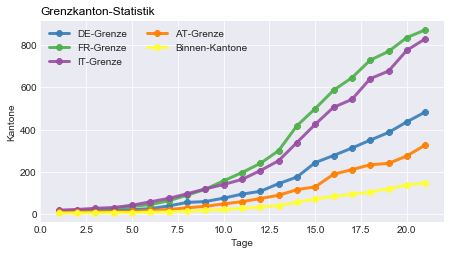

In [12]:
grenzkantone =pd.DataFrame({ 
                'DE-Grenze': de_gz,
                 'FR-Grenze': fr_gz,
                 'IT-Grenze': it_gz, 
                'AT-Grenze': at_gz,
            'Binnen-Kantone': no_gz,
                 })


# style
plt.style.use('seaborn-darkgrid')
fig= plt.figure(figsize=(7,3.5))

axes= fig.add_axes([0.1,0.1,0.8,0.8])
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in grenzkantone:
    num+=1
    plt.plot(lst,grenzkantone[column], marker='8', color=palette(num), linewidth=3, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Grenzkanton-Statistik", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Tage")
plt.ylabel("Kantone")


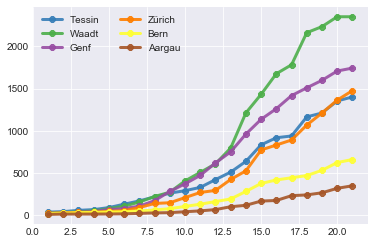

In [13]:
plt.plot(lst,df['TI'],marker='8', color=palette(1), linewidth=3, alpha=0.9, label='Tessin')
plt.plot(lst,df['VD'],marker='8', color=palette(2), linewidth=3, alpha=0.9, label='Waadt')
plt.plot(lst,df['GE'],marker='8', color=palette(3), linewidth=3, alpha=0.9, label='Genf')
plt.plot(lst,df['ZH'],marker='8', color=palette(4), linewidth=3, alpha=0.9, label='Zürich')
plt.plot(lst,df['BE'],marker='8', color=palette(5), linewidth=3, alpha=0.9, label='Bern')
plt.plot(lst,df['AG'],marker='8', color=palette(6), linewidth=3, alpha=0.9, label='Aargau')
# Add legend
plt.legend(loc=2, ncol=2)

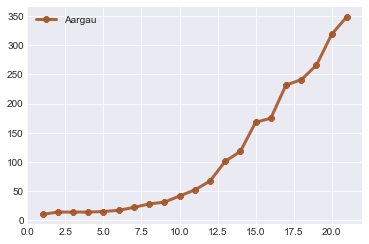

In [14]:
plt.plot(lst,df['AG'],marker='8', color=palette(6), linewidth=3, alpha=0.9, label='Aargau')
# Add legend
plt.legend(loc=2, ncol=2)


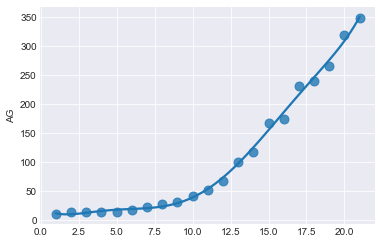

In [15]:
import seaborn as sns


ax = sns.regplot(x=lst, y=df['AG'],
                 scatter_kws={"s": 80},
                 order=6, ci=None,
                fit_reg= True)

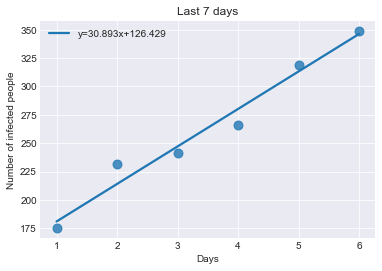

In [16]:
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress([1,2,3,4,5,6,7],df['AG'][-7:])

ax = sns.regplot(x=[1,2,3,4,5,6], y=df['AG'][-6:],
                 scatter_kws={"s": 80},
                 order=1, ci=None,
                line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})

plt.xlabel("Days")
plt.ylabel("Number of infected people")
plt.title("Last 7 days")

# plot legend
ax.legend()

plt.show()

In [17]:
deutsch=pd.DataFrame({ 
                'Bern':df['BE'],
             'Luzern': df['LU'],
           'Obwalden': df['OW'],
          'Nidwalden': df['NW'],
                'Uri': df['UR'],
             'Glarus': df['GL'],
             'Schwyz': df['SZ'],
                'Zug': df['ZG'], 
    'Appenzell Innerrhoden': df['AI'], 
        'Appenzell Ausserrhoden': df['AR'], 
        'St-Gallen':df['SG'],
        'Graubünden': df['GR'],
         'Zürich': df['ZH'],
         'Aargau': df['AG'],
         'Basel-Stadt': df['BS'], 
        'Basel-Land':df['BL'],
        'Thurgau':df['TG'],
        'Schaffhausen':df['SH'],
      'Graubünden': df['GR'], 
                 })

romandie =pd.DataFrame({ 
          'Jura': df['JU'], 
            'Neuenburg':df['NE'],
            'Waadt':df['VD'],
            'Genf':df['GE'],
            'Wallis':df['VS'],
         'Freiburg': df['FR'], 
                 })


In [18]:
de_ka = deutsch.mean(axis=1)
fr_ka = romandie.mean(axis=1)

Text(0, 0.5, 'Kantone')

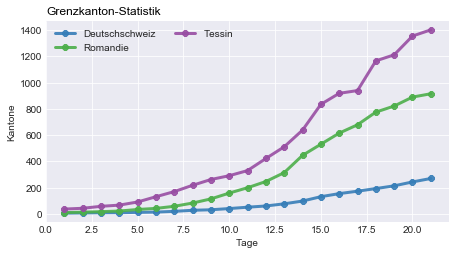

In [19]:
grenzkantone =pd.DataFrame({ 
                'Deutschschweiz': de_ka,
                'Romandie': fr_ka,
                 'Tessin': df['TI'], 
                 })


# style
plt.style.use('seaborn-darkgrid')
fig= plt.figure(figsize=(7,3.5))

axes= fig.add_axes([0.1,0.1,0.8,0.8])
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in grenzkantone:
    num+=1
    plt.plot(lst,grenzkantone[column], marker='8', color=palette(num), linewidth=3, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Grenzkanton-Statistik", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Tage")
plt.ylabel("Kantone")


Text(0.5, 1.0, 'Schweiz')

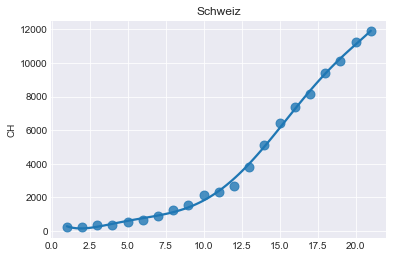

In [20]:
ax = sns.regplot(x=lst, y=df['CH'],
                 scatter_kws={"s": 80},
                 order=6, ci=None,
                fit_reg= True)

plt.title('Schweiz')